In [1]:
list.files()
load('us_search_and_flu_data.rdata')
#loads in data

[1] "Assignment 3.ipynb"            "Class_1_23_2018.ipynb"        
 [3] "class_2_13_2018.ipynb"         "Class_2_4_2018.ipynb"         
 [5] "FLS-data.csv"                  "growth_lasso_glmnet_example.R"
 [7] "Lasso_Assignment.ipynb"        "mytitanic.R"                  
 [9] "opioid_example_v1.R"           "opioid_example.csv"           
[11] "prostate_cancer-1.R"           "prostate.csv"                 
[13] "Regression.ipynb"              "Test.R"                       
[15] "test2flu.csv"                  "titanic3.csv"                 
[17] "us_search_and_flu_data.csv"    "us_search_and_flu_data.rdata"

In [2]:
dat = us_search_and_flu_data # renamed the data object

In [3]:
head(dat)

flu,fever,cough,soar_throat,headache,march_madness,basketball,random,arbitrary,date,⋯,l_4_flu_count,l_5_flu_count,l_6_flu_count,l_7_flu_count,l_8_flu_count,l_9_flu_count,l_10_flu_count,l_11_flu_count,l_12_flu_count,t
NA,NA,NA,NA,NA,NA,NA,NA,NA,525,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,1
NA,NA,NA,NA,NA,NA,NA,NA,NA,526,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,2
NA,NA,NA,NA,NA,NA,NA,NA,NA,527,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,3
8,44,22,34,27,2,26,74,23,528,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,4
7,44,19,49,29,3,29,77,30,529,⋯,4502,NA,NA,NA,NA,NA,NA,NA,NA,5
3,39,19,34,28,21,45,77,24,530,⋯,11716,4502,NA,NA,NA,NA,NA,NA,NA,6


In [4]:
colnames(dat)

[1] "flu"            "fever"          "cough"          "soar_throat"   
 [5] "headache"       "march_madness"  "basketball"     "random"        
 [9] "arbitrary"      "date"           "flu_count"      "l_1_flu_count" 
[13] "l_2_flu_count"  "l_3_flu_count"  "l_4_flu_count"  "l_5_flu_count" 
[17] "l_6_flu_count"  "l_7_flu_count"  "l_8_flu_count"  "l_9_flu_count" 
[21] "l_10_flu_count" "l_11_flu_count" "l_12_flu_count" "t"

In [5]:
clean_dat = dat[4:142,c(1:9,11:14,24)]
head(clean_dat)
#selecting rows 4-142 and columns 1-9, 11-14, and 24

,flu,fever,cough,soar_throat,headache,march_madness,basketball,random,arbitrary,flu_count,l_1_flu_count,l_2_flu_count,l_3_flu_count,t
4,8,44,22,34,27,2,26,74,23,8223,26111,26111,4502,4
5,7,44,19,49,29,3,29,77,30,5682,8223,8223,11716,5
6,3,39,19,34,28,21,45,77,24,3456,5682,5682,26111,6
7,2,42,18,47,26,1,16,75,25,3068,3456,3456,8223,7
8,2,41,18,30,27,0,13,68,39,3347,3068,3068,5682,8
9,1,38,18,78,30,0,12,69,27,2509,3347,3347,3456,9


In [6]:
rownames(clean_dat) = c()
#got rid of row names for aestetics 

In [7]:
head(clean_dat)

flu,fever,cough,soar_throat,headache,march_madness,basketball,random,arbitrary,flu_count,l_1_flu_count,l_2_flu_count,l_3_flu_count,t
8,44,22,34,27,2,26,74,23,8223,26111,26111,4502,4
7,44,19,49,29,3,29,77,30,5682,8223,8223,11716,5
3,39,19,34,28,21,45,77,24,3456,5682,5682,26111,6
2,42,18,47,26,1,16,75,25,3068,3456,3456,8223,7
2,41,18,30,27,0,13,68,39,3347,3068,3068,5682,8
1,38,18,78,30,0,12,69,27,2509,3347,3347,3456,9


In [8]:
set.seed(1234)
library(glmnet)


Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-16



In [9]:
clean_dat$set<-ifelse(runif(n=nrow(clean_dat))>=0.75,yes=2,no=1) # placed 75% of the data into training set and 25% into the test set

In [10]:
head(clean_dat)


flu,fever,cough,soar_throat,headache,march_madness,basketball,random,arbitrary,flu_count,l_1_flu_count,l_2_flu_count,l_3_flu_count,t,set
8,44,22,34,27,2,26,74,23,8223,26111,26111,4502,4,1
7,44,19,49,29,3,29,77,30,5682,8223,8223,11716,5,1
3,39,19,34,28,21,45,77,24,3456,5682,5682,26111,6,1
2,42,18,47,26,1,16,75,25,3068,3456,3456,8223,7,1
2,41,18,30,27,0,13,68,39,3347,3068,3068,5682,8,2
1,38,18,78,30,0,12,69,27,2509,3347,3347,3456,9,1


In [11]:
x = table(clean_dat$set)
x


  1   2 
110  29 

In [12]:
#1 is estimation and 2 is the holdout 

In [13]:
y.1 <- clean_dat[which(clean_dat$set==1),10]                     #Defines y=variable 10 if set=1
x.1 <- as.matrix(clean_dat[which(clean_dat$set==1),-10])         #Defines x=all but variable 10 if set=1
y.2 <- clean_dat[which(clean_dat$set==2),10]                     #y=var 10 if set=2; set 2 is 
x.2 <- as.matrix(clean_dat[which(clean_dat$set==2),-10])         # x=all but var 10 if set=2

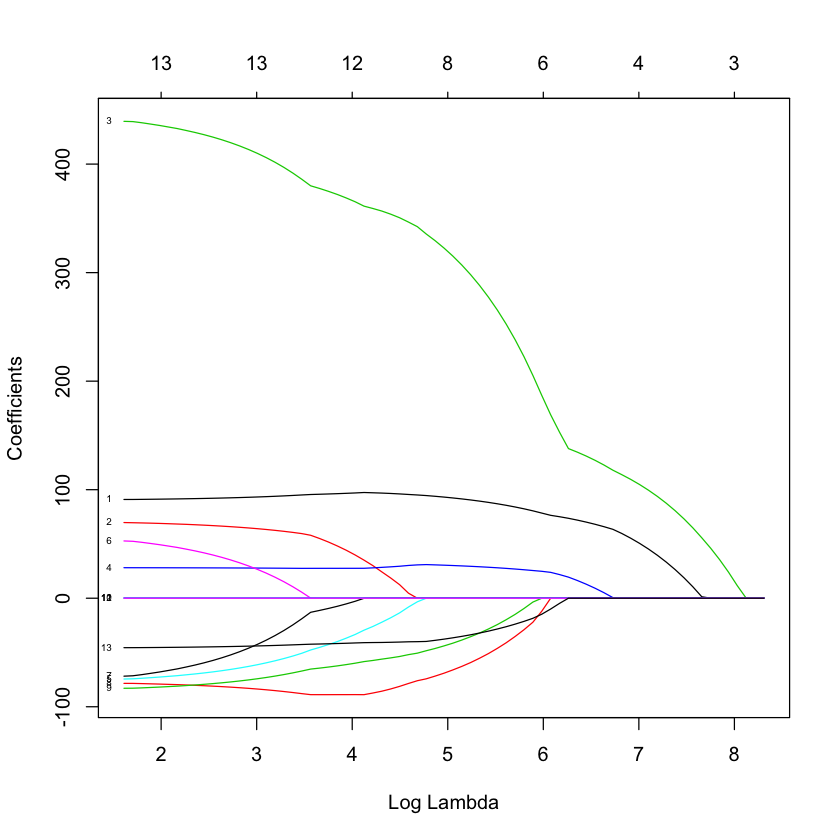

In [14]:
eq.1<-glmnet(y=y.1, x= x.1, family="gaussian")
plot(eq.1,"lambda",label=TRUE)

In [15]:
cv.1<-cv.glmnet(y=y.1,x=x.1,family="gaussian")

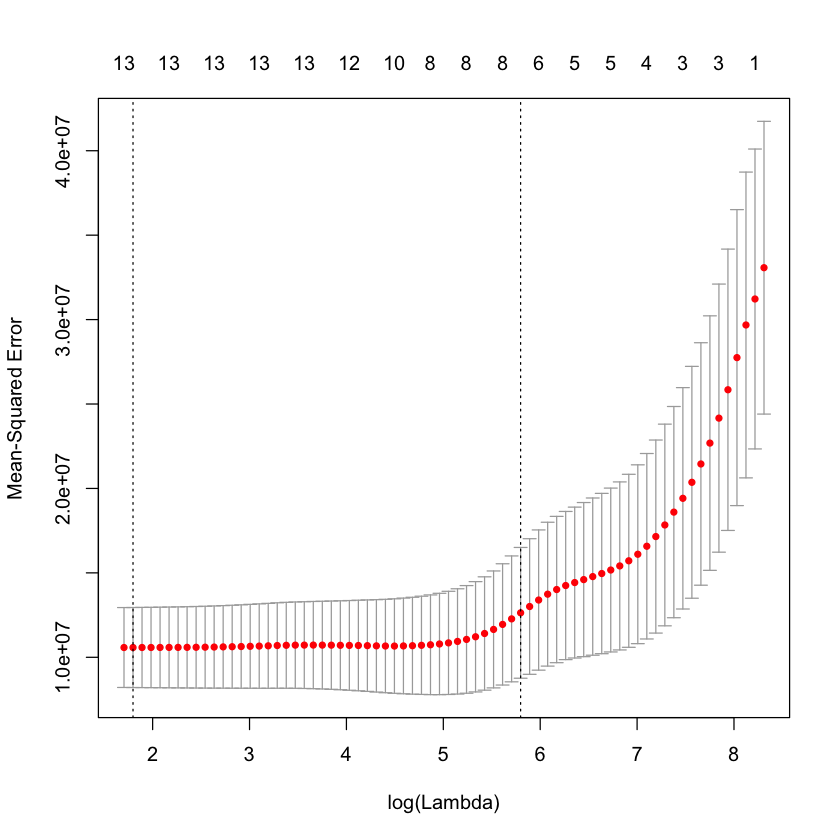

In [16]:
plot(cv.1)

In [17]:
coef(cv.1)


15 x 1 sparse Matrix of class "dgCMatrix"
                          1
(Intercept)   -6.697341e+02
flu            8.237558e+01
fever          .           
cough          2.225425e+02
soar_throat    2.623619e+01
headache       .           
march_madness  .           
basketball     .           
random        -2.902569e+01
arbitrary     -9.463370e+00
l_1_flu_count  3.157676e-01
l_2_flu_count  1.035865e-15
l_3_flu_count  .           
t             -2.133332e+01
set            .           

In [18]:
predict.1.1 <- predict(cv.1, newx=x.1)
insmse.1<-mean((y.1-predict.1.1)^2)
summary(insmse.1)
predict.1.2 <- predict(cv.1, newx=x.2)
oosmse.1<-mean((y.2-predict.1.2)^2)
summary(oosmse.1)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
8723296 8723296 8723296 8723296 8723296 8723296 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
7319691 7319691 7319691 7319691 7319691 7319691 

2. My in sample mean squared error was 8723296, while my out of sample mean squared error was 7319691. 
